### **Assignment No. 1**

Apply MLP Classifier on Wine Dataset

In [2]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv("winequality_red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


1.Split dataset into train and test.

In [18]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,0:11]
y=df.iloc[:, -1]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [15]:
xtrain

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
126,8.2,1.330,0.00,1.7,0.081,3.0,12.0,0.99640,3.53,0.49,10.9
810,7.3,0.490,0.10,2.6,0.068,4.0,14.0,0.99562,3.30,0.47,10.5
635,8.7,0.840,0.00,1.4,0.065,24.0,33.0,0.99540,3.27,0.55,9.7
598,8.5,0.585,0.18,2.1,0.078,5.0,30.0,0.99670,3.20,0.48,9.8
880,9.2,0.560,0.18,1.6,0.078,10.0,21.0,0.99576,3.15,0.49,9.9
...,...,...,...,...,...,...,...,...,...,...,...
715,7.2,0.490,0.18,2.7,0.069,13.0,34.0,0.99670,3.29,0.48,9.2
905,9.2,0.580,0.20,3.0,0.081,15.0,115.0,0.99800,3.23,0.59,9.5
1096,6.6,0.725,0.09,5.5,0.117,9.0,17.0,0.99655,3.35,0.49,10.8
235,7.2,0.630,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0


In [19]:
ytest

75      5
1283    6
408     6
1281    6
1118    6
       ..
1596    6
985     6
671     5
1379    6
1169    6
Name: quality, Length: 480, dtype: int64

In [20]:
#shape
print("xtrain shape",xtrain.shape)
print("ytrain shape",ytrain.shape)
print("xtest shape",xtest.shape)

xtrain shape (1119, 11)
ytrain shape (1119,)
xtest shape (480, 11)


2.Apply MinMaxScalar on training data.

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
xtrain_transform=scaler.fit_transform(xtrain)
xtrain_transform

array([[0.31858407, 0.82876712, 0.        , ..., 0.62204724, 0.09580838,
        0.38461538],
       [0.23893805, 0.25342466, 0.1       , ..., 0.44094488, 0.08383234,
        0.32307692],
       [0.36283186, 0.49315068, 0.        , ..., 0.41732283, 0.13173653,
        0.2       ],
       ...,
       [0.17699115, 0.41438356, 0.09      , ..., 0.48031496, 0.09580838,
        0.36923077],
       [0.2300885 , 0.34931507, 0.        , ..., 0.49606299, 0.1497006 ,
        0.09230769],
       [0.39823009, 0.19178082, 0.5       , ..., 0.37007874, 0.21556886,
        0.63076923]])

3.Apply MinMaxScalar on testing data.

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
xtest_transform=scaler.fit_transform(xtest)
xtest_transform

array([[0.35849057, 0.29145729, 0.81012658, ..., 0.76136364, 0.1835443 ,
        0.33962264],
       [0.3490566 , 0.51256281, 0.35443038, ..., 0.44318182, 0.16455696,
        0.28301887],
       [0.50943396, 0.22110553, 0.73417722, ..., 0.36363636, 0.20886076,
        0.49056604],
       ...,
       [0.30188679, 0.61306533, 0.26582278, ..., 0.375     , 0.09493671,
        0.1509434 ],
       [0.23584906, 0.45226131, 0.02531646, ..., 0.55681818, 0.15822785,
        0.39622642],
       [0.24528302, 0.38190955, 0.36708861, ..., 0.51136364, 0.15822785,
        0.52830189]])

In [23]:
xtest_transform[0:10]

array([[0.35849057, 0.29145729, 0.81012658, 0.0890411 , 0.09440559,
        0.09230769, 0.12720848, 0.62628488, 0.76136364, 0.1835443 ,
        0.33962264],
       [0.3490566 , 0.51256281, 0.35443038, 0.12328767, 0.09965035,
        0.21538462, 0.22261484, 0.53377386, 0.44318182, 0.16455696,
        0.28301887],
       [0.50943396, 0.22110553, 0.73417722, 0.19178082, 0.23601399,
        0.04615385, 0.03533569, 0.50881057, 0.36363636, 0.20886076,
        0.49056604],
       [0.19811321, 0.34170854, 0.25316456, 0.06849315, 0.06643357,
        0.38461538, 0.16961131, 0.40602056, 0.56818182, 0.17088608,
        0.32075472],
       [0.19811321, 0.27135678, 0.15189873, 0.08219178, 0.04545455,
        0.16923077, 0.06360424, 0.17988253, 0.48863636, 0.10126582,
        0.86792453],
       [0.18867925, 0.10050251, 0.37974684, 0.06164384, 0.04545455,
        0.2       , 0.04946996, 0.48825257, 0.84090909, 0.28481013,
        0.24528302],
       [0.35849057, 0.15075377, 0.58227848, 0.08219178, 0.

4. Apply MLPClassifier on training data.

In [44]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(hidden_layer_sizes=(150,100,45),activation = 'relu',max_iter=100,solver='adam')      #150,100,45==hidden layers
model.fit(xtrain_transform,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(150, 100, 45), max_iter=100)

In [45]:
ypred=model.predict(xtest_transform)

5. Confusion matrix

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(ytest,ypred)
print("accuracy is: ",accuracy)

accuracy is:  0.5895833333333333


In [47]:
cm=confusion_matrix(ytest,ypred)
cm

array([[  0,   1,   1,   0,   0,   0],
       [  1,   2,  16,   2,   0,   0],
       [  0,   2, 182,  23,   0,   0],
       [  0,   4,  93,  90,   8,   0],
       [  0,   2,   5,  36,   9,   0],
       [  0,   0,   0,   1,   2,   0]])

6. Classification report.

In [48]:
from sklearn.metrics import classification_report
cr=classification_report(ytest,ypred)
cr

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         2\n           4       0.18      0.10      0.12        21\n           5       0.61      0.88      0.72       207\n           6       0.59      0.46      0.52       195\n           7       0.47      0.17      0.25        52\n           8       0.00      0.00      0.00         3\n\n    accuracy                           0.59       480\n   macro avg       0.31      0.27      0.27       480\nweighted avg       0.56      0.59      0.56       480\n'

7. plot graph of model loss.

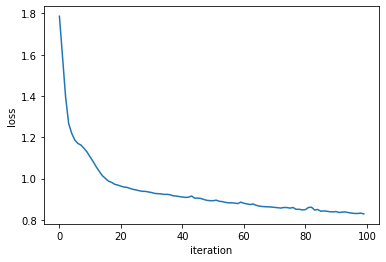

In [49]:
plt.plot(model.loss_curve_)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

8. Apply GridsearchCV.

In [50]:
max_iter=[100,200,250,150,300]
solver=['sgd','adam']
activation=['tanh','sigmoid','relu']
alpha=[0.0001,0.10,0.05]

In [51]:
from sklearn.model_selection import GridSearchCV
param_grid={'max_iter':max_iter,'solver':solver,'activation':activation,'alpha':alpha}
gridsearch=GridSearchCV(model,param_grid,cv=5)
gridsearch.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(150, 100, 45),
                                     max_iter=100),
             param_grid={'activation': ['tanh', 'sigmoid', 'relu'],
                         'alpha': [0.0001, 0.1, 0.05],
                         'max_iter': [100, 200, 250, 150, 300],
                         'solver': ['sgd', 'adam']})

9. Best parameters and best score.

In [52]:
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'activation': 'tanh', 'alpha': 0.05, 'max_iter': 250, 'solver': 'adam'}
0.6023022101217169
